# House Price Prediction

**In this assigment, students will utilise knowledge about Keras and Machine Learning to build a model to solve certain example data set provide by SKLearn, Tensorflow, and Keras.**

 Assigment1. Explore data visualisation

* Follow Material to make some visualisation to gain insight from a dataset
* Template: California Housing prices.
* Task: Titanic dataset

* Step1. Fetch Data 

In [3]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

* Take a Quick Look at the Data Structure

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

Look at the top five rows using the DataFrame’s head() method

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The `info()` method is useful to get a quick description of the data

In [ ]:
housing.info()

In [ ]:
housing["ocean_proximity"].value_counts()

In [ ]:
housing.describe()

Histogram 

In [ ]:
housing.columns

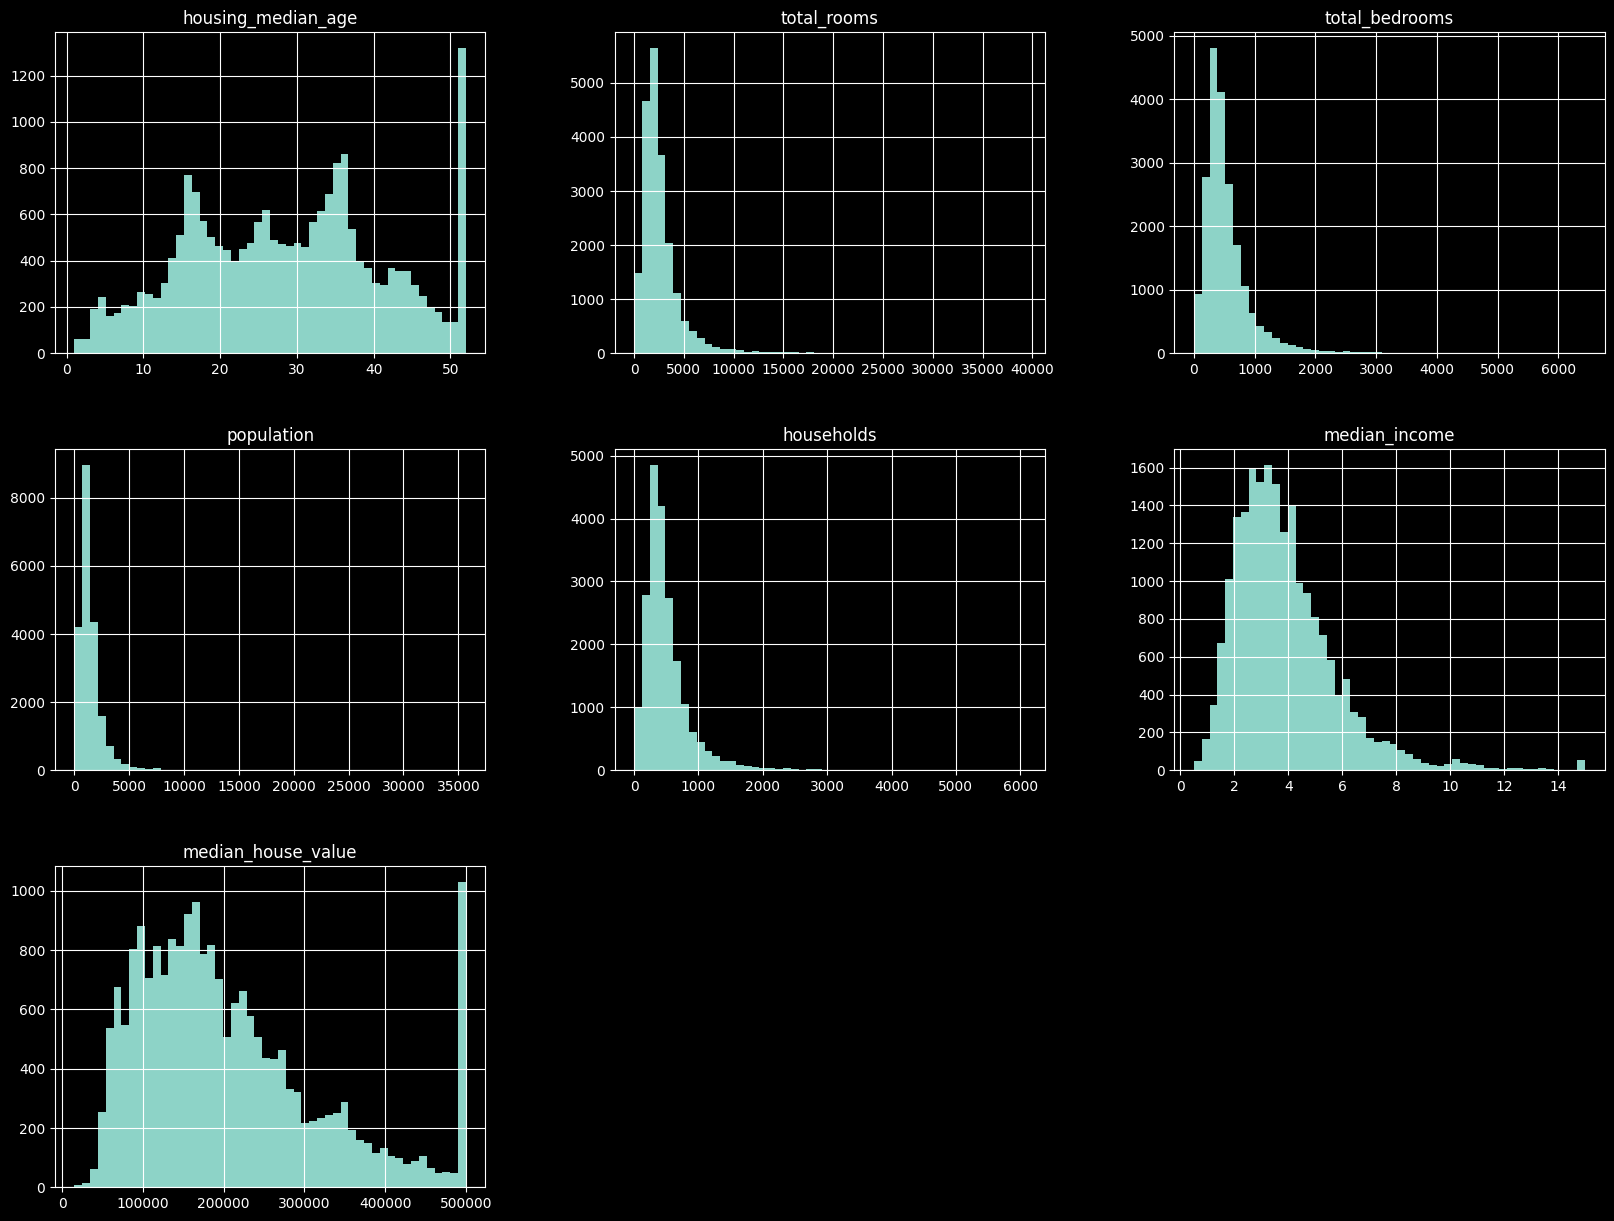

In [7]:
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15), column=housing.columns[2:])
plt.show()

* Visualizing Geographical Data

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

* Looking for Correlations

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

Look at how much each attribute correlates with the median house value:

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# Titanic

* Titanic dataset
* https://www.tensorflow.org/datasets/catalog/titanic

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

* Your work start from here to visualise as much information of Titanic dataset as possible. Make relevant comments about this dataset.
* Follow chapter 2: End-to-End Machine Learning Project in Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow Concepts, Tools, and Techniques to Build Intelligent... (Aurélien Géron) 
* You need to make comments about the relationship between label (in this case the label is "survived" column) with other features. Whether they have strong relationship or not.
* You also can show some graphs to visualise this relationship and their score based on the guideline the chapter 2. 
* It will provide you some knowledge on how to read a pandas or csv file and how to get initial information about the dataset you will work with.
* This Assignment takes up 20% of the this test and I just evaluate how much information you can show and interpret from this data set. So feel free if you can show more than the template.
* There should not be identical between groups, otherwise you will not be allowed for this test.
* Every student is supposed to understand the code as I will ask randomly a member in your group to explain to me your code, It also affects to your team score. So please join with your group to complete this task successfully.

**Assignmet 2. Build a customised Machine Learning model using Keras to predict dead cases on Titanic.**
* https://www.tensorflow.org/tutorials/estimator/linear

* Feature Engineering for the Mode

In [ ]:
dftrain.head()

* In this dataset, label column is survived, the rest is features.
* Store pandas data into x_train_df and y_train_df to do the preprocess
* The same thing for x_test_df and y_test_df.

In [ ]:
y_train_df = dftrain["survived"]
x_train_df = dftrain.drop(labels = ["survived"],axis=1)
y_test_df  = dfeval["survived"]
x_test_df  = dfeval.drop(labels = ["survived"],axis=1)

#should be pandas type, right?
print("Type of x_train_df:",type(x_train_df))

#Show data frame
x_train_df.head()

In [ ]:
# Descrbie numberic set in pandas frame
x_train_df.describe()

In [ ]:
# Show info
x_train_df.info()
# not missing data here, it is so lucky because we do not need to deal with them

In [ ]:
# Check Class catergory detail
x_train_df["class"].value_counts()

* sex, class, deck, embark_town, and alone are not numberic columns--> convert to numberic columns by some function.
* The three most common are as follows:

1.   Integer Encoding: Where each unique label is mapped to an integer.
2.   One Hot Encoding: Where each label is mapped to a binary vector.
1.   Learned Embedding: Where a distributed representation of the categories is learned.

* 

      For instance: "classes" columns including [first,second,third]
      catergories So if one point in "class" column is "first"--> 
      it will convert to a vector of binary looks like this [1,0,0], 
      we can recognise that only one point in this vector is "hot"(1), 
      it shows the position of label in the label vector. That is why we call One hot Encoding .

* Please read Chapter 2 in text book to have more insights into how we deal with complexed features. It might help you obtain better result in training.

In [ ]:
CATERGORY_COLUMNS=["sex","class","deck","embark_town","alone"]
NUMBERIC_COLUMNS=["age","n_siblings_spouses","parch","fare"]
x_train_catergory_df = x_train_df[CATERGORY_COLUMNS]
x_test_catergory_df = x_test_df[CATERGORY_COLUMNS]

# Concat by the first axis (row)
x_catergory = pd.concat([x_train_catergory_df,x_test_catergory_df],axis=0)

# Use SKlearn to utilise OnHotEncoder library
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Train One Hot Vectors model, it is necessary to see all data to make sure that
# no category is missed
cat_encoder.fit(x_catergory)

# Convert data to one hot code
x_train_catergory_1hot = cat_encoder.transform(x_train_catergory_df)
x_test_catergory_1hot = cat_encoder.transform(x_test_catergory_df)

# Because one hot code array x_train_catergory_1hot_df is in
# sparse format(to reduce redundance data 0)
# we need to convert back into dense format
x_train_catergory_1hot = x_train_catergory_1hot.toarray()
x_test_catergory_1hot = x_test_catergory_1hot.toarray()
# Print the result.
# Note that the number of columns now is substantially increase
# print(x_train_catergory_1hot.shape)

In [ ]:
x_train_catergory_1hot

In [ ]:
# Show all catergory in cat_encoder
cat_encoder.categories_

In [ ]:
# Merge One hot data with numberic data.
import numpy as np
#.Train data
x_train_numberic = x_train_df[NUMBERIC_COLUMNS].to_numpy()
x_train_transformed = np.concatenate([x_train_numberic,x_train_catergory_1hot],axis = 1)
y_train = y_train_df.to_numpy()
#. Test data
x_test_numberic = x_test_df[NUMBERIC_COLUMNS].to_numpy()
x_test_transformed = np.concatenate([x_test_numberic,x_test_catergory_1hot],axis = 1)
y_test = y_test_df.to_numpy()
x_test_transformed

In [ ]:
# Include call back class to do early stopping
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

Because this dataset is too small in term of quantitive so it is not effective if we split 
train data into train and valid set.

In [ ]:
# Base model
import tensorflow as tf
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation ='relu', input_shape = x_train_transformed.shape[1:]),
    tf.keras.layers.Dense(10, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid') #For binary classification, please refer slide to double check
])
base_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
base_model.fit(x_train_transformed,y_train,callbacks=[callback],epochs = 1000)

In [ ]:
# Training Accuracy is around 0.8931--> the model is relatively good!
# Most importance of the model is to evaluate with test set. Let's do it right now!
base_model.evaluate(x_test_transformed,y_test)
# After testing, the accuracy reduced to 0.7955, but it is still acceptable.

* Let improve model by feature engineering 
* We can scale numberic features to a range which will support ML algorithms better.
* Two common ways to get all attributes to have the same scale: min-max
scaling and standardization.


1.   min-max scaling(normalization): Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. 
2.   standardization: First it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).



In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

x_train_numberic_df = x_train_df[NUMBERIC_COLUMNS]
x_test_numberic_df = x_test_df[NUMBERIC_COLUMNS]

x_numberic_df = pd.concat([x_train_numberic_df,x_test_numberic_df],axis = 0)

scaler = MinMaxScaler()
scaler.fit(x_numberic_df)

x_train_numberic_transformed = scaler.transform(x_train_numberic_df)

x_test_numberic_transformed = scaler.transform(x_test_numberic_df)

print(x_train_numberic_transformed)

In [ ]:
x_train_catergory_df = x_train_df[CATERGORY_COLUMNS]
x_test_catergory_df = x_test_df[CATERGORY_COLUMNS]

#Concat by the first axis (row)
x_catergory = pd.concat([x_train_catergory_df,x_test_catergory_df],axis=0)

#Use SKlearn to utilise OnHotEncoder library
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

#Train One Hot Vectors model, it is necessary to see all data to make sure that
# no category is missed
cat_encoder.fit(x_catergory)

#Convert data to one hot code
x_train_catergory_1hot = cat_encoder.transform(x_train_catergory_df)
x_test_catergory_1hot = cat_encoder.transform(x_test_catergory_df)

# Because one hot code array x_train_catergory_1hot_df is in 
# sparse format(to reduce redundance data 0)
# we need to convert back into dense format
x_train_catergory_1hot = x_train_catergory_1hot.toarray()
x_test_catergory_1hot = x_test_catergory_1hot.toarray()
# Print the result.
# Note that the number of columns now is substantially increase
#print(x_train_catergory_1hot.shape)

In [ ]:
# Merge One hot data with numberic data.
import numpy as np
#.Train data
x_train_transformed = np.concatenate([x_train_numberic_transformed,x_train_catergory_1hot],axis = 1)
y_train = y_train_df.to_numpy()
#. Test data
x_test_transformed = np.concatenate([x_test_numberic_transformed,x_test_catergory_1hot],axis = 1)
y_test = y_test_df.to_numpy()

In [ ]:
base_model_2 = keras.Sequential([
    keras.layers.Dense(30, activation ='relu', input_shape = x_train_transformed.shape[1:]),
    keras.layers.Dense(10, activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid') # For binary classification, please refer slide to double check
])
base_model_2.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
base_model_2.fit(x_train_transformed,y_train,callbacks=[callback],epochs = 1000)

In [ ]:
base_model_2.evaluate(x_test_transformed,y_test)
# This model is slightly better than the previous one.
# Therefore our feature engineering strategy may be work out, but we need to test
# several time to make sure it doesn't happen by chance.

**Assignment 2.** 
Your work continue from here.
* You need to modify base_model by any techniques that you have learnt from the lectures (even non sequential model is acceptable).
* It is not importance that you have to train with  higher accuracy than the base model, but it should show that you understand how to build a DNN model to solve a problem and how to deal with sophisticated dataset. 
* In addition, please include callback function and tensorboard (learn from session1, session2) to make early stoping and display training history.
* I divided the class into 3 groups, so I expect the model of each group is unique. In another word, if you copy the result of other groups, both groups will be considered as failing this assignment.
* To test the result, you should run your code successfully in google colab, then you can show me the highest result that you train. The group with the highest test accuracy score will have bonus points for to recognise your work.
* Every student is supposed to understand the work of your group because I will ask randomly one student in the group to explain the model.
